In [1]:
import os 
os.listdir()

['train.csv',
 'DataCleaning.ipynb',
 'PA_201605-2012001更新R6(20190509).xlsx',
 'tag盤點表.xlsx',
 'xgboost.ipynb',
 'train_FeatureSelected.csv',
 'feature select.ipynb',
 'tpot_pa_pipeline.py',
 'TPOT.ipynb',
 'cnn-time-stack.ipynb',
 '.ipynb_checkpoints']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# load

In [3]:
df = pd.read_csv('train_FeatureSelected.csv',index_col = 0,parse_dates = True)
print(df.shape)
df.head()

(122775, 15)


,MLPAP_TI-0706B15,MLPAP_TI-0706B21,MLPAP_TI-0716A03,MLPAP_TI-0716A05,MLPAP_TJR-0720A1.PV,MLPAP_TJR-0720B2.PV,MLPAP_TJR-0762A1.PV,MLPAP_TI-0706B01,MLPAP_TRC-0610.PV,MLPAP_TIC-1721.PV,MLPAP_TRC-1734.PV,MLPAP_FR-0755.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target
0,0.436520,0.527857,2.885848,0.448321,0.677295,0.881300,0.796872,0.633992,3.036852,3.099501,0.608934,-2.619894,-1.015438,-0.088287,0.914125
1,0.436520,0.527857,2.885848,0.448321,0.677122,0.881648,0.797089,0.633992,2.864041,3.272350,0.447358,-2.614712,-0.982340,-0.088287,0.919765
2,0.436830,0.527857,2.885848,0.448321,0.677619,0.881571,0.796987,0.633992,3.006620,3.596289,-0.634915,-2.617016,-0.975999,-0.088287,0.926346
3,0.411821,0.395807,2.856863,0.468480,0.641630,0.853312,0.763786,0.601863,1.710665,3.361869,0.769126,-2.612469,-0.840360,-0.088287,0.906781
4,0.412131,0.395807,2.882331,0.468480,0.642077,0.853810,0.764300,0.603356,1.822449,3.029603,0.528846,-2.620588,-0.868595,-0.088287,0.926688


# split

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('target',axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

# fit

In [5]:
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

model = XGBRegressor(objective="reg:squarederror")
model.fit(X_train, y_train)

/workspace/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

# eval

In [6]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))
print(round(mean_squared_error(y_test,y_pred),4))

0.361132638833239
0.0001


# plot

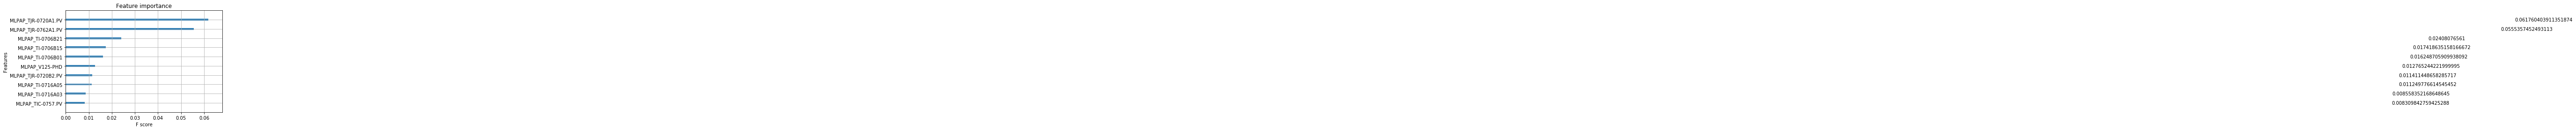

In [7]:
import xgboost
xgboost.plot_importance(model,max_num_features=10,importance_type="gain")
plt.show()

In [8]:
chmap = pd.read_excel('tag盤點表.xlsx')[['TAG','chinese']]
chmap = dict(zip(chmap['TAG'],chmap['chinese']))

In [9]:
FIMP = pd.DataFrame(model.feature_importances_,index=X.columns,columns=['imp'])
FIMP['中文'] = FIMP.index.map(chmap)
FIMP = FIMP.sort_values(by='imp',ascending=False)
FIMP[['中文','imp']].head(10).style.background_gradient()

,中文,imp
MLPAP_TJR-0720A1.PV,鹽浴溫度,0.246881
MLPAP_TJR-0762A1.PV,鹽浴溫度,0.221999
MLPAP_TI-0706B21,反應槽溫度_多點式(高度 2150),0.0962605
MLPAP_TI-0706B15,反應槽溫度_多點式(高度 1550),0.0696293
MLPAP_TI-0706B01,反應槽觸媒溫度_高度(2865),0.0649526
MLPAP_V125-PHD,粗PA儲槽PHD,0.0510278
MLPAP_TJR-0720B2.PV,鹽浴溫度,0.0456162
MLPAP_TI-0716A05,nan,0.0449699
MLPAP_TI-0716A03,nan,0.0342112
MLPAP_TIC-0757.PV,反應器A/B側鹽浴溫度差,0.0332178
